In [3]:
import pandas as pd
df = pd.read_csv("D:\\5th semester\\Papers\\student_mental_health.csv")
df.head()


,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?",...,"2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\nPercentage missing:")
print((df.isnull().sum() / len(df) * 100).round(2))

Missing values per column:
1. Age                                                                                                                                                                   0
2. Gender                                                                                                                                                                0
3. University                                                                                                                                                            0
4. Department                                                                                                                                                            0
5. Academic Year                                                                                                                                                         0
6. Current CGPA                                                                                                       

In [5]:
y = df["Depression Label"]


In [6]:
X = df.drop(columns=["Depression Value", "Depression Label"])


In [7]:
# Check class imbalance
print("Class distribution (Depression Label):")
print(y.value_counts())
print("\nClass proportions:")
print(y.value_counts(normalize=True))

Class distribution (Depression Label):
Depression Label
Moderately Severe Depression    495
Severe Depression               488
Moderate Depression             449
Mild Depression                 408
Minimal Depression               93
No Depression                    44
Name: count, dtype: int64

Class proportions:
Depression Label
Moderately Severe Depression    0.250379
Severe Depression               0.246839
Moderate Depression             0.227112
Mild Depression                 0.206373
Minimal Depression              0.047041
No Depression                   0.022256
Name: proportion, dtype: float64


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_cols = X.select_dtypes(include=['int','float']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median"))
])

cat_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
# Apply SMOTE to handle class imbalance (optional - comment out if not needed)
# Install: pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import pandas as pd

# First preprocess the training data before SMOTE
X_train_preprocessed = preprocessor.fit_transform(X_train)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_preprocessed, y_train)

print(f"Original training set size: {X_train.shape[0]}")
print(f"Resampled training set size: {X_train_res.shape[0]}")
print(f"\nOriginal class distribution:")
print(y_train.value_counts())
print(f"\nResampled class distribution:")
# Convert numpy array back to Series for value_counts
print(pd.Series(y_train_res).value_counts())

Original training set size: 1581
Resampled training set size: 2370

Original class distribution:
Depression Label
Severe Depression               395
Moderately Severe Depression    383
Moderate Depression             354
Mild Depression                 337
Minimal Depression               77
No Depression                    35
Name: count, dtype: int64

Resampled class distribution:
Depression Label
Severe Depression               395
Moderate Depression             395
Moderately Severe Depression    395
Mild Depression                 395
No Depression                   395
Minimal Depression              395
Name: count, dtype: int64


In [14]:
from sklearn.ensemble import RandomForestClassifier
# Option 1: Train with SMOTE resampled data (use this if you ran SMOTE above)
# Since X_train_res is already preprocessed, we only need the classifier
model_with_smote = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)
model_with_smote.fit(X_train_res, y_train_res)

# For predictions, we need to preprocess X_test separately
X_test_preprocessed = preprocessor.transform(X_test)

# Option 2: Train without SMOTE (original pipeline approach - comment out if using SMOTE)
# model = Pipeline([
#     ("preprocess", preprocessor),
#     ("rf", RandomForestClassifier(
#         n_estimators=200,
#         max_depth=None,
#         random_state=42,
#         class_weight="balanced"
#     ))
# ])
# model.fit(X_train, y_train)

In [15]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# If using SMOTE model:
y_pred = model_with_smote.predict(X_test_preprocessed)

# If using original pipeline (no SMOTE), use:
# y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8106060606060606

Classification Report:
                              precision    recall  f1-score   support

             Mild Depression       0.77      0.83      0.80        71
          Minimal Depression       0.60      0.56      0.58        16
         Moderate Depression       0.79      0.75      0.77        95
Moderately Severe Depression       0.81      0.82      0.81       112
               No Depression       1.00      0.78      0.88         9
           Severe Depression       0.89      0.89      0.89        93

                    accuracy                           0.81       396
                   macro avg       0.81      0.77      0.79       396
                weighted avg       0.81      0.81      0.81       396


Confusion Matrix:
[[59  4  8  0  0  0]
 [ 7  9  0  0  0  0]
 [11  0 71 13  0  0]
 [ 0  0 10 92  0 10]
 [ 0  2  0  0  7  0]
 [ 0  0  1  9  0 83]]


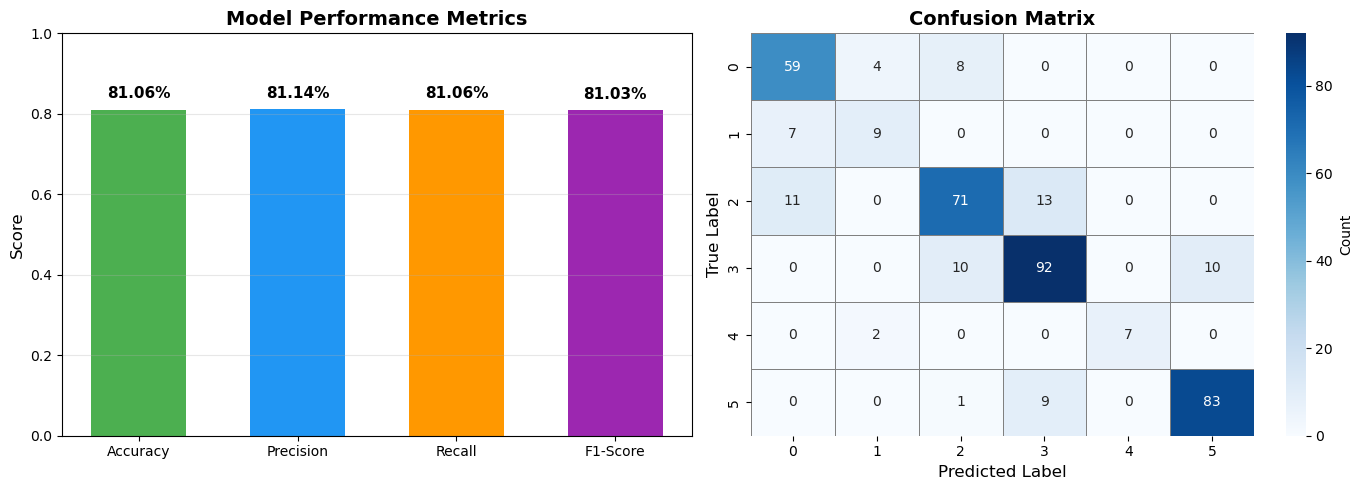


MODEL PERFORMANCE SUMMARY
Accuracy:  0.8106 (81.06%)
Precision: 0.8114 (81.14%)
Recall:    0.8106 (81.06%)
F1-Score:  0.8103 (81.03%)


In [24]:
# Visualize model performance metrics
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Metrics Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [acc, precision, recall, f1]
colors = ['#4caf50', '#2196f3', '#ff9800', '#9c27b0']

bars = axes[0].bar(metrics, values, color=colors, width=0.6)
axes[0].set_ylim(0, 1)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, val in zip(bars, values):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{val:.2%}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1], 
            cbar_kws={'label': 'Count'}, linewidths=0.5, linecolor='gray')
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_title('Confusion Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*50)
print("MODEL PERFORMANCE SUMMARY")
print("="*50)
print(f"Accuracy:  {acc:.4f} ({acc:.2%})")
print(f"Precision: {precision:.4f} ({precision:.2%})")
print(f"Recall:    {recall:.4f} ({recall:.2%})")
print(f"F1-Score:  {f1:.4f} ({f1:.2%})")
print("="*50)

In [17]:
import numpy as np

# If using SMOTE model (model_with_smote):
# Extract the preprocessor components for feature names
ohe = preprocessor.named_transformers_["cat"]["onehot"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_cols, cat_feature_names])

# Get feature importances from the SMOTE-trained model
importances = model_with_smote.feature_importances_

# Show top 15
sorted_idx = importances.argsort()[::-1][:15]

print("Top 15 Most Important Features:")
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

Top 15 Most Important Features:
4. In a semester, how often have you been feeling tired or having little energy? : 0.0733
6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down? : 0.0684
2. In a semester, how often have you been feeling down, depressed or hopeless?: 0.0656
Anxiety Value: 0.0580
7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television? : 0.0565
1. In a semester, how often have you had little interest or pleasure in doing things?: 0.0562
5. In a semester, how often have you had poor appetite or overeating? : 0.0559
3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much? : 0.0547
8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless? : 0.0479
9. In a semester, how ofte

In [19]:
import joblib

# Save the SMOTE-trained model
# Create a pipeline that includes preprocessing for easier deployment
model = Pipeline([
    ("preprocess", preprocessor),
    ("rf", model_with_smote)
])

joblib.dump(model, "mental_health_model.pkl")
print('Saved model to mental_health_model.pkl')

Saved model to mental_health_model.pkl


In [20]:
# Example: load the saved model and run a quick verification
import joblib
import pandas as pd
# Load the saved pipeline
loaded_model = joblib.load("D:\\5th semester\\Papers\\mental_health_model.pkl")
print('Loaded model:', type(loaded_model))
# Optionally run a quick prediction on a few test rows
try:
    X_sample = X_test.iloc[:5] if hasattr(X_test, 'iloc') else X_test[:5]
    preds = loaded_model.predict(X_sample)
    print('Predictions for first 5 test rows:', preds)
except Exception as e:
    print('Could not run quick predict check:', type(e).__name__, e)


Loaded model: <class 'sklearn.pipeline.Pipeline'>
Predictions for first 5 test rows: ['Moderately Severe Depression' 'Moderate Depression'
 'Moderately Severe Depression' 'Severe Depression' 'Minimal Depression']


In [21]:
{
  "cell_type": "code",
  "metadata": {
    "language": "python"
  },
  "source": [
    "# Robust model check: use X_test if present, else try CSV, else fallback to a manual sample\n",
    "import os, joblib, pandas as pd\n",
    "model_path = r\"D:\\\\5th semester\\\\Papers\\\\mental_health_model.pkl\"  # adjust if you use mental_health_model.pkl\n",
    "print('Model path:', model_path)\n",
    "m = joblib.load(model_path)\n",
    "print('Loaded model type:', type(m))\n",
    "\n",
    "if 'X_test' in globals():\n",
    "    X_sample = X_test.head(5)\n",
    "    print('Using existing X_test from notebook.')\n",
    "else:\n",
    "    csv_path = r\"D:\\\\5th semester\\\\Papers\\\\student_mental_health.csv\"\n",
    "    if os.path.exists(csv_path):\n",
    "        df = pd.read_csv(csv_path)\n",
    "        # Try to remove label columns if present\n",
    "        for candidate in ['Depression Label', 'Depression Value', 'Stress Label', 'Anxiety Label']:\n",
    "            if candidate in df.columns:\n",
    "                try:\n",
    "                    df = df.drop(columns=[candidate])\n",
    "                except Exception:\n",
    "                    pass\n",
    "        X_sample = df.head(5)\n",
    "        print('Using first 5 rows from CSV as sample inputs.')\n",
    "    else:\n",
    "        # Fallback manual sample: adjust column names to match the model's expected input\n",
    "        X_sample = pd.DataFrame([[1.0, 1.0, 1.0]], columns=['stress_score','anxiety_score','depression_score'])\n",
    "        print('CSV not found. Using manual sample DataFrame with columns:', list(X_sample.columns))\n",
    "\n",
    "print('Sample columns:', list(X_sample.columns))\n",
    "try:\n",
    "    preds = m.predict(X_sample)\n",
    "    print('Predictions:', preds)\n",
    "except Exception as e:\n",
    "    print('Predict error:', type(e).__name__, e)\n",
    "    # Helpful diagnostics: show what columns the model wanted (if available)\n",
    "    try:\n",
    "        # If the pipeline has a preprocessor that stores feature names, print them\n",
    "        if hasattr(m, 'named_steps') and 'preprocess' in m.named_steps:\n",
    "            print('Pipeline preprocess step present; it likely expects the original dataset columns.')\n",
    "    except Exception:\n",
    "        pass\n"
  ]
}

{'cell_type': 'code',
 'metadata': {'language': 'python'},
 'source': ['# Robust model check: use X_test if present, else try CSV, else fallback to a manual sample\n',
  'import os, joblib, pandas as pd\n',
  'model_path = r"D:\\\\5th semester\\\\Papers\\\\mental_health_model.pkl"  # adjust if you use mental_health_model.pkl\n',
  "print('Model path:', model_path)\n",
  'm = joblib.load(model_path)\n',
  "print('Loaded model type:', type(m))\n",
  '\n',
  "if 'X_test' in globals():\n",
  '    X_sample = X_test.head(5)\n',
  "    print('Using existing X_test from notebook.')\n",
  'else:\n',
  '    csv_path = r"D:\\\\5th semester\\\\Papers\\\\student_mental_health.csv"\n',
  '    if os.path.exists(csv_path):\n',
  '        df = pd.read_csv(csv_path)\n',
  '        # Try to remove label columns if present\n',
  "        for candidate in ['Depression Label', 'Depression Value', 'Stress Label', 'Anxiety Label']:\n",
  '            if candidate in df.columns:\n',
  '                try:\n',

In [22]:
# run in the notebook or a quick Python cell
import sys
print(sys.executable)

c:\Users\Nuha\miniconda3\envs\tf-gpu\python.exe


In [23]:
# Optional: extract and save encoders / metadata separately
# This is useful if you need the encoder for a different runtime or to inspect mappings
import joblib
try:
    preprocessor = model.named_steps['preprocess']
    # Attempt to extract OneHotEncoder from categorical pipeline
    try:
        cat_pipe = preprocessor.named_transformers_['cat']
        ohe = cat_pipe.named_steps['onehot']
        joblib.dump(ohe, 'encoders_ohe.pkl')
        print('Saved OneHotEncoder to encoders_ohe.pkl')
    except Exception as e:
        print('No categorical OneHotEncoder found or extraction failed:', type(e).__name__, e)
    # Save column lists / metadata so you can reconstruct features elsewhere
    try:
        meta = {'num_cols': list(num_cols), 'cat_cols': list(cat_cols)}
        joblib.dump(meta, 'encoders_metadata.pkl')
        print('Saved encoder metadata to encoders_metadata.pkl')
    except Exception as e:
        print('Could not save encoder metadata:', type(e).__name__, e)
except Exception as e:
    print('Preprocessor extract failed (is the pipeline named the same?):', type(e).__name__, e)


Saved OneHotEncoder to encoders_ohe.pkl
Saved encoder metadata to encoders_metadata.pkl


## Do you need a separate `encoders.pkl` file?

- If you saved the entire scikit-learn `Pipeline` with `joblib.dump(model, 'model.pkl')`, the preprocessing steps (including `OneHotEncoder`) are embedded inside that pipeline. In that case you do NOT need a separate `encoders.pkl` to load and run predictions in Python — `joblib.load('model.pkl')` restores everything.

- Save separate encoder files (the cell above writes `encoders_ohe.pkl` and `encoders_metadata.pkl`) when:",
,
,
,
,
,
,